In [1]:
pip install dtreeviz.trees

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement dtreeviz.trees (from versions: none)
ERROR: No matching distribution found for dtreeviz.trees


In [19]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import statistics as stat
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans , AgglomerativeClustering, DBSCAN
import graphviz
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [20]:
Housing_Data=pd.read_csv('Housing_Data_5.csv')
Housing_Data=Housing_Data.drop(columns=['Unnamed: 0'])
Housing_Data

,bathrooms,bedrooms,city,country,currency,latitude,livingArea,longitude,lotAreaUnit,priceForHDP,rentZestimate,state,streetAddress,taxAssessedValue,zestimate,zipcode,priceinmil,lotArea
0,4.0,4.0,Denver,USA,USD,39.724728,2202.0,-104.959140,sqft,1500000.0,3170.0,CO,530 University Boulevard,726200.0,1031000.0,80206,1.5000,3.6290
1,3.0,4.0,Denver,USA,USD,39.648630,2659.0,-105.055405,sqft,725000.0,2429.0,CO,3781 S Benton Way,444900.0,455700.0,80235,0.7250,12.2150
2,5.0,4.0,Denver,USA,USD,39.770897,3991.0,-105.013214,sqft,1800000.0,7454.0,CO,3926 Vallejo Street,621200.0,1395200.0,80211,1.8000,6.2500
3,5.0,6.0,Denver,USA,USD,39.665450,3838.0,-104.963524,sqft,1500000.0,3746.0,CO,2832 S Race Street,712500.0,1474576.0,80210,1.5000,8.7120
4,3.0,4.0,Denver,USA,USD,39.769943,2292.0,-105.021260,sqft,1200000.0,3405.0,CO,2730 W Denver Place,216300.0,870300.0,80211,1.2000,4.9050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,2.0,3.0,Mills,USA,USD,42.835503,3372.0,-106.413000,sqft,449900.0,2128.0,WY,1302 River Heights Dr,327731.0,431700.0,82604,0.4499,11.7612
839,2.0,4.0,Douglas,USA,USD,42.763844,2304.0,-105.382230,sqft,110000.0,1935.0,WY,403 N 4th St,135752.0,169900.0,82633,0.1100,11.3256
840,2.0,3.0,Evanston,USA,USD,41.254820,1150.0,-110.959460,sqft,159000.0,1195.0,WY,801 Sioux Dr,114419.0,149900.0,82930,0.1590,0.5760
841,4.0,6.0,Gillette,USA,USD,44.245415,5022.0,-105.562035,sqft,998000.0,3622.0,WY,5221 Rocky Point Dr,638339.0,728600.0,82718,0.9980,424.2744


In [21]:
Housing_Data['range_1'] = pd.cut(Housing_Data['zestimate'], bins=[0,400000,800000,float('inf')], labels=['Low','Medium','High'])

In [22]:
Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   bathrooms         843 non-null    float64 
 1   bedrooms          843 non-null    float64 
 2   city              843 non-null    object  
 3   country           843 non-null    object  
 4   currency          843 non-null    object  
 5   latitude          843 non-null    float64 
 6   livingArea        843 non-null    float64 
 7   longitude         843 non-null    float64 
 8   lotAreaUnit       843 non-null    object  
 9   priceForHDP       843 non-null    float64 
 10  rentZestimate     843 non-null    float64 
 11  state             843 non-null    object  
 12  streetAddress     843 non-null    object  
 13  taxAssessedValue  843 non-null    float64 
 14  zestimate         843 non-null    float64 
 15  zipcode           843 non-null    int64   
 16  priceinmil        843 non-

In [23]:
Housing_Data['range_1'] = Housing_Data['range_1'].astype('category').cat.codes

In [24]:
counts = Housing_Data['range_1'].value_counts()
counts

0    512
1    237
2     94
Name: range_1, dtype: int64

In [25]:
Housing_Data_1 = Housing_Data.select_dtypes(include='number')
Housing_Data_1=Housing_Data_1.drop(columns=['longitude'])

In [26]:
Housing_Data_2 = Housing_Data_1.sample(n=843, random_state=42)
Housing_Data_2

,bathrooms,bedrooms,latitude,livingArea,priceForHDP,rentZestimate,taxAssessedValue,zestimate,zipcode,priceinmil,lotArea,range_1
493,1.0,3.0,37.090595,1077.0,137500.0,816.0,46770.0,130755.0,64801,0.1375,12.196800,0
215,3.0,4.0,32.916492,2035.0,372000.0,2185.0,198732.0,372000.0,29420,0.3720,10.018800,0
622,3.0,4.0,46.908290,2896.0,299000.0,2166.0,296300.0,357800.0,58401,0.2990,18.600120,0
737,1.0,2.0,38.661960,960.0,224900.0,1150.0,100794.0,168600.0,84724,0.2249,40.075200,0
63,2.0,4.0,29.578120,2253.0,225000.0,2199.0,223335.0,225000.0,77089,0.2250,7.819020,0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,4.0,4.0,32.827625,3660.0,750000.0,2034.0,361890.0,740859.0,75218,0.7500,22.259160,1
106,4.0,4.0,33.459800,2380.0,770000.0,3300.0,442600.0,749084.0,85257,0.7700,2.962080,1
270,3.0,3.0,38.881073,2094.0,1750000.0,4800.0,975850.0,1705626.0,20003,1.7500,1.194000,2
435,2.0,3.0,42.579037,1970.0,345000.0,2499.0,229300.0,347300.0,1440,0.3450,16.903000,0


In [27]:
from sklearn.model_selection import train_test_split
TrainDF, TestDF = train_test_split(Housing_Data_2, test_size=0.3)
print(TrainDF)
print(TestDF)

     bathrooms  bedrooms   latitude  livingArea  priceForHDP  rentZestimate  \
782        1.0       3.0  46.376490       992.0     235000.0         1274.0   
14         3.0       4.0  39.779568      2811.0    1175000.0         4798.0   
513        2.0       3.0  41.328274      1306.0     245000.0         1606.0   
478        6.0       7.0  32.343643      5317.0    1595000.0        11073.0   
73         3.0       4.0  32.951748      3222.0     649950.0         4999.0   
..         ...       ...        ...         ...          ...            ...   
842        1.0       2.0  42.836254       640.0     183000.0          926.0   
42         2.0       3.0  29.856743      1650.0     269900.0         1892.0   
632        2.0       4.0  48.259777      2526.0     624900.0         3739.0   
517        2.0       3.0  41.222603      2006.0     499000.0         2565.0   
836        2.0       2.0  41.171420      1793.0     300000.0         1223.0   

     taxAssessedValue  zestimate  zipcode  priceinm

In [28]:
Test1Labels=TestDF["range_1"]
print(Test1Labels)
## remove labels
TestDF1 = TestDF.drop(["range_1"], axis=1)
print(TestDF1)

## TRAIN ----------------------------
Train1Labels=TrainDF["range_1"]
print(Train1Labels)
## remove labels
TrainDF1 = TrainDF.drop(["range_1"], axis=1)
print(TrainDF1)

547    1
624    0
354    0
125    0
330    0
      ..
373    0
364    0
138    0
346    0
381    0
Name: range_1, Length: 253, dtype: int8
     bathrooms  bedrooms   latitude  livingArea  priceForHDP  rentZestimate  \
547        3.0       4.0  35.997750      3862.0    1555555.0         4003.0   
624        2.0       4.0  46.899487      2648.0     349900.0         1761.0   
354        2.0       2.0  46.856380      1410.0     279900.0         1794.0   
125        2.0       3.0  36.794426      1220.0     384900.0         2044.0   
330        2.0       3.0  41.600266      1152.0     199900.0          999.0   
..         ...       ...        ...         ...          ...            ...   
373        2.0       4.0  37.695430      1872.0     219900.0         1321.0   
364        3.0       4.0  47.891068      2915.0     365000.0         2157.0   
138        2.0       2.0  41.270657      1482.0     479000.0         2400.0   
346        2.0       5.0  46.800385      2174.0     299900.0         16

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
#import graphviz 
from sklearn.metrics import confusion_matrix
MyDT=DecisionTreeClassifier(criterion='entropy', ##"entropy" or "gini"
                            splitter='best',
                           max_depth=2,
                           class_weight=None)

In [30]:
MyDT.fit(TrainDF, Train1Labels)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.4, 0.8333333333333334, 'X[7] <= 400600.0\nentropy = 1.299\nsamples = 590\nvalue = [358, 169, 63]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 358\nvalue = [358, 0, 0]'),
 Text(0.6, 0.5, 'X[7] <= 804337.5\nentropy = 0.844\nsamples = 232\nvalue = [0, 169, 63]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 169\nvalue = [0, 169, 0]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 63\nvalue = [0, 0, 63]')]

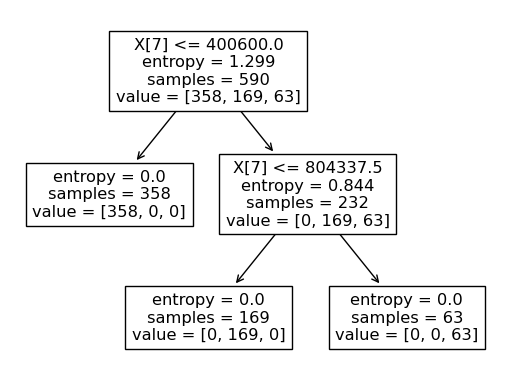

In [31]:
 tree.plot_tree(MyDT)

In [34]:
from sklearn.naive_bayes import MultinomialNB
MyModelNB= MultinomialNB()
NB1=MyModelNB.fit(TrainDF1, Train1Labels)
Prediction1 = MyModelNB.predict(TestDF1)
Prediction1

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 1, 2, 0, 2, 0, 2, 0, 2, 2,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1,
       2, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 1, 2, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0,
       1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 2, 2,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 2, 2, 1,
       0, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 1, 2, 1, 0, 2,
       2, 2, 2, 0, 0, 2, 1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2,
       0, 1, 1, 1, 0, 2, 0, 0, 2, 0, 0], dtype=int8)

In [16]:
from sklearn.metrics import confusion_matrix

cnf_matrix1 = confusion_matrix(Test1Labels, Prediction1)
print("\nThe confusion matrix is:")
print(cnf_matrix1)



The confusion matrix is:
[[111  27  14]
 [ 11  25  34]
 [  0   7  24]]


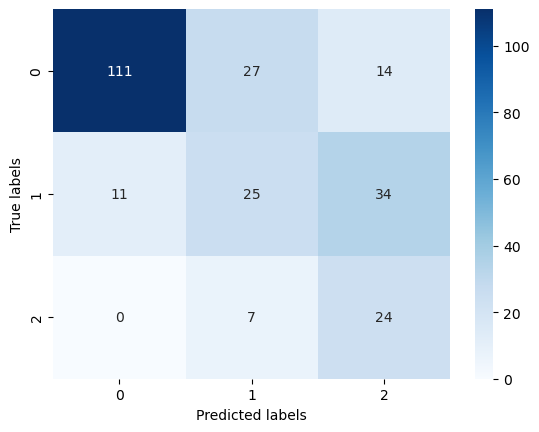

In [17]:
sns.heatmap(cnf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [18]:
# SVM
svm = SVC(kernel='rbf', C=1)
svm.fit(TrainDF1, Train1Labels)
pred= svm.predict(TestDF1)
print("\nThe Accuracy Score is:")
accuracy_score(Test1Labels,pred)
pred


The Accuracy Score is:


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       0, 1, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 2, 1, 1, 2, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 1, 2,
       0, 0, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 2, 1, 2, 0, 2, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 2, 1, 1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 2,
       0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0], dtype=int8)

In [32]:
cnf_matrix2 = confusion_matrix(Test1Labels, pred)
print("\nThe confusion matrix is:")
print(cnf_matrix2)


The confusion matrix is:
[[151   3   0]
 [  2  65   1]
 [  0   3  28]]


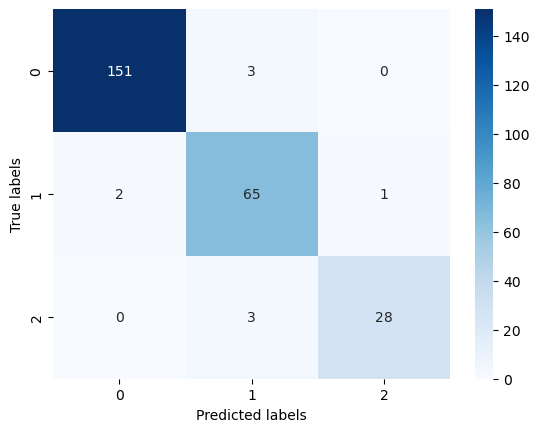

In [33]:
sns.heatmap(cnf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [34]:
svm = SVC(kernel='rbf', C=2)
svm.fit(TrainDF1, Train1Labels)
pred= svm.predict(TestDF1)
print("\nThe Accuracy Score is:")
accuracy_score(Test1Labels,pred)


The Accuracy Score is:


0.9723320158102767

In [35]:
cnf_matrix2 = confusion_matrix(Test1Labels, pred)
print("\nThe confusion matrix is:")
print(cnf_matrix2)


The confusion matrix is:
[[151   3   0]
 [  2  65   1]
 [  0   1  30]]


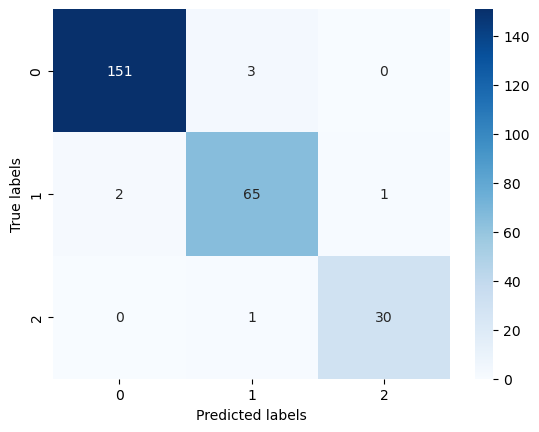

In [36]:
sns.heatmap(cnf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [37]:
svm = SVC(kernel='rbf', C=3)
svm.fit(TrainDF1, Train1Labels)
pred= svm.predict(TestDF1)
print("\nThe Accuracy Score is:")
accuracy_score(Test1Labels,pred)


The Accuracy Score is:


0.9802371541501976

In [38]:
cnf_matrix2 = confusion_matrix(Test1Labels, pred)
print("\nThe confusion matrix is:")
print(cnf_matrix2)


The confusion matrix is:
[[151   3   0]
 [  1  67   0]
 [  0   1  30]]


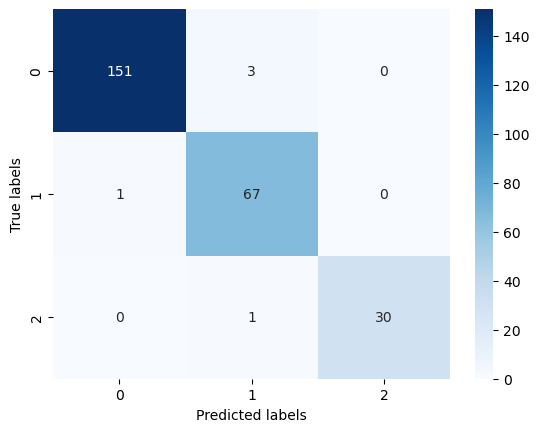

In [39]:
sns.heatmap(cnf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [40]:
svm = SVC(kernel='poly', C=1)
svm.fit(TrainDF1, Train1Labels)
pred= svm.predict(TestDF1)
print("\nThe Accuracy Score is:")
accuracy_score(Test1Labels,pred)


The Accuracy Score is:


0.9644268774703557

In [41]:
cnf_matrix2 = confusion_matrix(Test1Labels, pred)
print("\nThe confusion matrix is:")
print(cnf_matrix2)


The confusion matrix is:
[[151   3   0]
 [  5  63   0]
 [  0   1  30]]


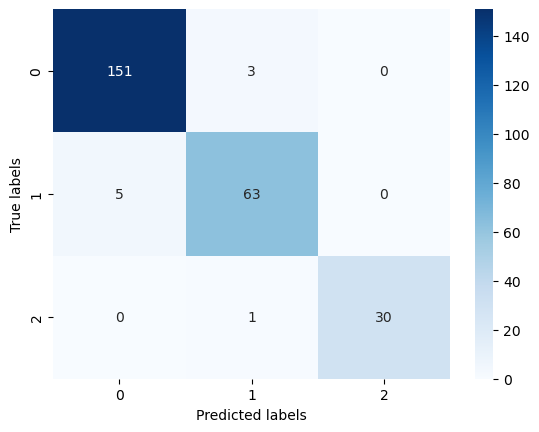

In [42]:
sns.heatmap(cnf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [43]:
svm = SVC(kernel='poly', C=2)
svm.fit(TrainDF1, Train1Labels)
pred= svm.predict(TestDF1)
print("\nThe Accuracy Score is:")
accuracy_score(Test1Labels,pred)


The Accuracy Score is:


0.9683794466403162

In [44]:
cnf_matrix2 = confusion_matrix(Test1Labels, pred)
print("\nThe confusion matrix is:")
print(cnf_matrix2)


The confusion matrix is:
[[151   3   0]
 [  4  64   0]
 [  0   1  30]]


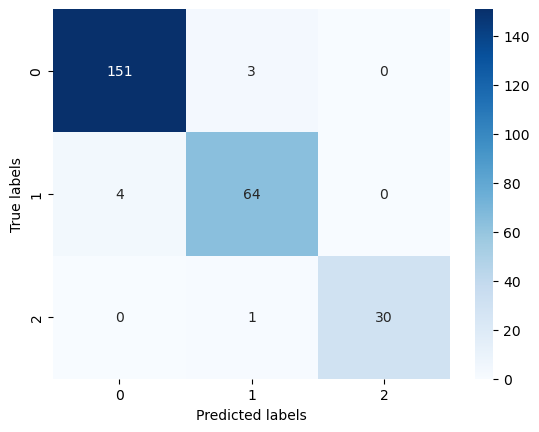

In [45]:
sns.heatmap(cnf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [46]:
svm = SVC(kernel='poly', C=3)
svm.fit(TrainDF1, Train1Labels)
pred= svm.predict(TestDF1)
print("\nThe Accuracy Score is:")
accuracy_score(Test1Labels,pred)


The Accuracy Score is:


0.9683794466403162

In [47]:
cnf_matrix2 = confusion_matrix(Test1Labels, pred)
print("\nThe confusion matrix is:")
print(cnf_matrix2)


The confusion matrix is:
[[151   3   0]
 [  4  64   0]
 [  0   1  30]]


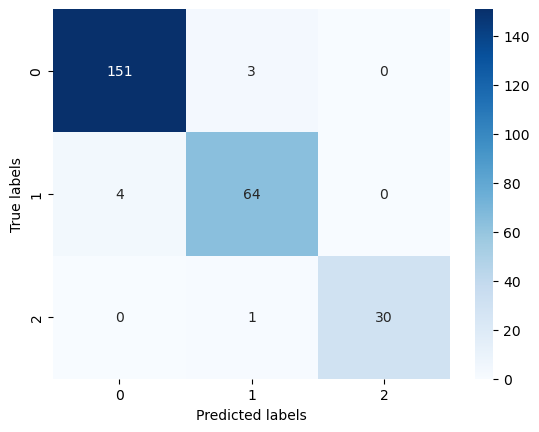

In [48]:
sns.heatmap(cnf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [52]:
svm = SVC(kernel='linear', C=1)
svm.fit(TrainDF1, Train1Labels)
pred= svm.predict(TestDF1)
print("\nThe Accuracy Score is:")
accuracy_score(Test1Labels,pred)


The Accuracy Score is:


1.0

In [53]:
cnf_matrix2 = confusion_matrix(Test1Labels, pred)
print("\nThe confusion matrix is:")
print(cnf_matrix2)


The confusion matrix is:
[[154   0   0]
 [  0  68   0]
 [  0   0  31]]


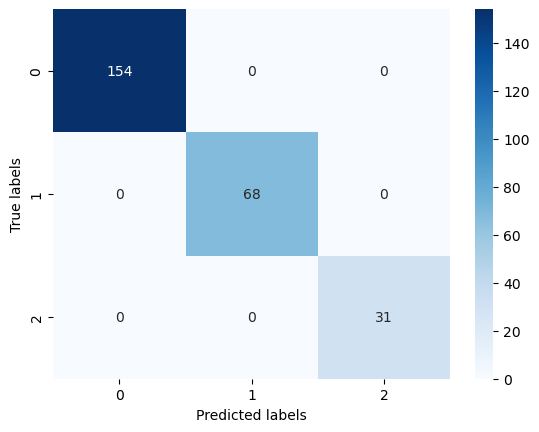

In [54]:
sns.heatmap(cnf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [55]:
svm = SVC(kernel='linear', C=2)
svm.fit(TrainDF1, Train1Labels)
pred= svm.predict(TestDF1)
print("\nThe Accuracy Score is:")
accuracy_score(Test1Labels,pred)


The Accuracy Score is:


1.0

In [56]:
cnf_matrix2 = confusion_matrix(Test1Labels, pred)
print("\nThe confusion matrix is:")
print(cnf_matrix2)


The confusion matrix is:
[[154   0   0]
 [  0  68   0]
 [  0   0  31]]


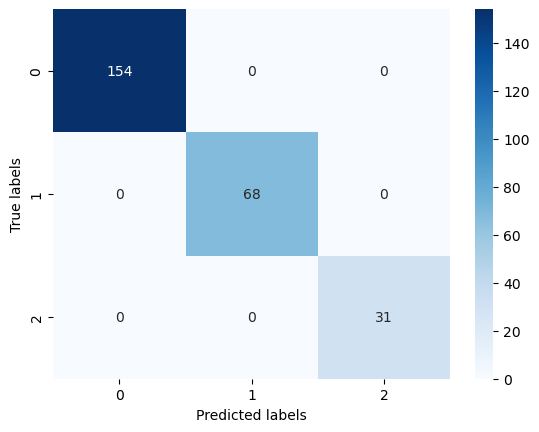

In [57]:
sns.heatmap(cnf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [58]:
svm = SVC(kernel='linear', C=3)
svm.fit(TrainDF1, Train1Labels)
pred= svm.predict(TestDF1)
print("\nThe Accuracy Score is:")
accuracy_score(Test1Labels,pred)


The Accuracy Score is:


1.0

In [59]:
cnf_matrix2 = confusion_matrix(Test1Labels, pred)
print("\nThe confusion matrix is:")
print(cnf_matrix2)


The confusion matrix is:
[[154   0   0]
 [  0  68   0]
 [  0   0  31]]


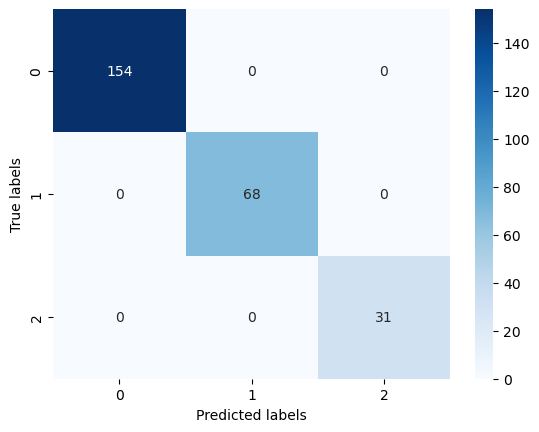

In [60]:
sns.heatmap(cnf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()